# Handeling Time Series Data With Pandas
As the name suggests, most of our data will have a datetime component to it. We will going through how to handle datetime index in python.We will be going through:
        - DateTime Index and DateTime library
        - Time Resampling
        - Time Shifting
        - Rolling and Expanding
        - Time Series viz

## Python datetime module

Before we start it is important to understand what a module is.

A **module** is simply a collection of variables, functions, and/or classes that can be imported into a Python script.Python contains many standard modules that help us perform various tasks, such as performing advanced mathematical operations, working with specific file formats and databases, and working with dates and times.

Python has three standard modules that are designed to help working with dates and times:
        - The `calendar` module
        - The `time` module
        - the `datetime` module
        
We will be only focussing on [`datetime module`](https://docs.python.org/3/library/datetime.html#module-datetime). The datetime module contains a number of classes, including:

* `datetime.datetime`: For working with date and time data.
* `datetime.time`: For working with time data only.
* `datetime.timedelta`: For representing time periods.

you can see that module and class share the same name,which can cause some confusion. This is something we will have to keep in mind.

In [46]:
import datetime as dt #import datetime module

my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_sec = 15


In [47]:
my_date =dt.datetime(my_year,my_month,my_day)
my_date #year,month,day,hour = 0,min = 0

datetime.datetime(2020, 1, 2, 0, 0)

In [48]:
my_date_time = dt.datetime(my_year,my_month,my_day,my_hour,my_minute,my_sec)
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [49]:
# you can grab any component of datetime object you want
my_date.day

2

In [50]:
my_date_time.hour

13

## NumPy Datetime Arrays
NumPy handles dates more efficiently than Python's datetime format.<br>
The NumPy data type is called <em>datetime64</em> to distinguish it from Python's datetime.[reference](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)

In [51]:
import numpy as np
np.array(['2019-05-21','2020-04-25','2025-05-01'],dtype = 'datetime64')

array(['2019-05-21', '2020-04-25', '2025-05-01'], dtype='datetime64[D]')

NOTE: We see the dtype listed as <tt>'datetime64[D]'</tt>. This tells us that NumPy applied a day-level date precision.
If we want we can pass in a different measurement, such as <TT>[h]</TT> for hour or <TT>[Y]</TT> for year.</div>

In [52]:
np.array(['2019-05-21','2020-04-25','2025-05-01'],dtype = 'datetime64[Y]')

array(['2019', '2020', '2025'], dtype='datetime64[Y]')

In [53]:
np.array(['2019-05-21','2020-04-25','2025-05-01'],dtype = 'datetime64[h]')

array(['2019-05-21T00', '2020-04-25T00', '2025-05-01T00'],
      dtype='datetime64[h]')

## NumPy Date Ranges
Just as <tt>np.arange(start,stop,step)</tt> can be used to produce an array of evenly-spaced integers, we can pass a <tt>dtype</tt> argument to obtain an array of dates. Remember that the stop date is <em>exclusive</em>.

In [54]:
#AN ARRAY OF DATES FROM 07/01/19 TO 07/17/19 SPACED ONE day APART
np.arange('2019-07-01','2019-07-17',1,dtype = 'datetime64[D]')

array(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
       '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
       '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
       '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16'],
      dtype='datetime64[D]')

In [55]:
#AN ARRAY OF DATES FROM 07/01/19 TO 07/17/2020 SPACED ONE month APART
np.arange('2019-07-01','2020-07-17',1,dtype = 'datetime64[M]')

array(['2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'],
      dtype='datetime64[M]')

In [56]:
np.arange('2019-07-01','2020-08-17',1,dtype = 'datetime64[Y]')

array(['2019'], dtype='datetime64[Y]')

In [57]:
np.arange('1979','2020',dtype = 'datetime64[Y]')

array(['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'], dtype='datetime64[Y]')

## Pandas Datetime Index

We deal with time series as a datetime index when working with pandas dataframes.Pandas has a lot of functions and methods to work with time series! [reference](https://pandas.pydata.org/pandas-docs/stable/timeseries.html)

In [58]:
import pandas as pd
pd.date_range('2020-01-01',periods=7,freq='D')#shift + tab

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [59]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

refer this [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) for acceptable values

In [60]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [61]:
pd.to_datetime(['2/1/2018','03/01/2018'],format='%d/%m/%Y') #what if we use non-american date dd-mm-yyyy
#we need to use format parameter and format according to strftime 

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

## Pandas Datetime Analysis

In [62]:
data = np.random.randn(3,2)
data

array([[ 0.07297023,  1.09167187],
       [-0.27514343,  0.87888489],
       [ 0.31007904, -0.80095249]])

In [63]:
data = pd.DataFrame(np.random.randn(3,2),columns=['A','B'],index=pd.date_range('2020-01-01',periods = 3,freq = 'D'))
data

,A,B
2020-01-01,-0.046350,0.778029
2020-01-02,0.362701,1.202310
2020-01-03,0.451133,-1.760866


In [64]:
data.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [65]:
data.index.max() #max date

Timestamp('2020-01-03 00:00:00', freq='D')

In [66]:
data.index.argmax() #index location of max date

2

## Time Resampling
Aggregating based on time data.

In [67]:
df = pd.read_csv('starbucks.csv',index_col = 'Date')#,parse_dates = True)
df.index.dtype

dtype('O')

The data type pf index not, we need to instruct python to parse index as date.


In [68]:
df = pd.read_csv('starbucks.csv',index_col = 'Date',parse_dates = True)
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [69]:
#exploring the data
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## resample()

A common operation with time series data is resampling based on the time series index. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

In [70]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function. **rule** parameter decribes the frequecy to apply aggreagting functions.The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [71]:
#resampling daily to yearly, don't foregt to use aggregating function
df.resample(rule = 'A').mean() #3 years of average stock price and volume traded,yearly frequency

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [72]:
#custom resampling
def first_day(entry):
    if len(entry) != 0:
        return entry[0]

In [73]:
df.resample(rule ='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


## Data Viz with pandas datetime

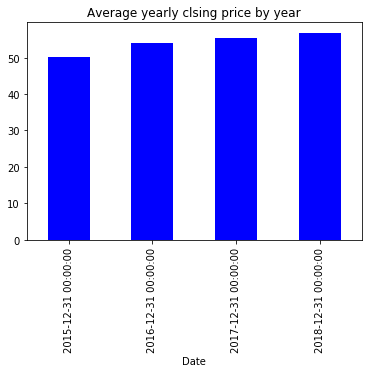

In [74]:
%matplotlib inline
df['Close'].resample('A').mean().plot.bar(title='Average yearly clsing price by year',color ='b')

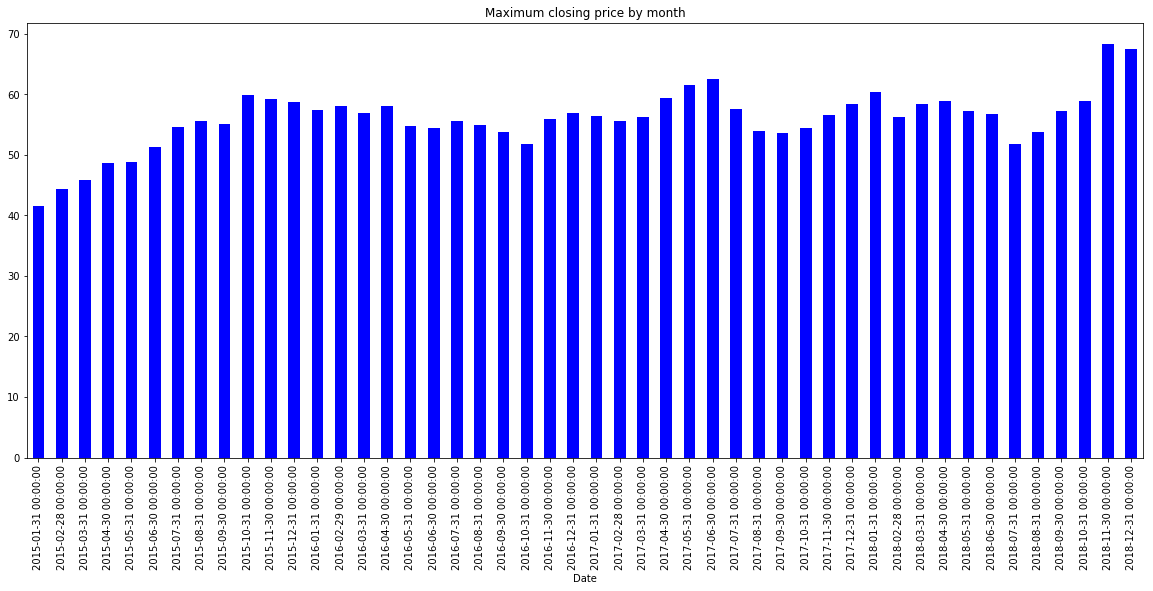

In [75]:
df['Close'].resample('M').max().plot.bar(figsize = (20,8),title = 'Maximum closing price by month',color = 'b')

# Time Shifting


In [76]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [77]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [78]:
#we want to shift dataset
df.shift(periods=1)#dataset pushed down 1 row
#we loose information

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
2015-01-09,38.4961,13170548.0
2015-01-12,37.2361,27556706.0
2015-01-13,37.4415,10021486.0
2015-01-14,37.7401,11040702.0


In [79]:
df.shift(periods=5).head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,38.0061,6906098.0
2015-01-12,37.2781,11623796.0
2015-01-13,36.9748,7664340.0
2015-01-14,37.8848,9732554.0


In [80]:
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [81]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [82]:
df.shift(periods=1,freq ='M') #comapare with orginal dataset

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
2015-01-31,37.2361,27556706
2015-01-31,37.4415,10021486
2015-01-31,37.7401,11040702
2015-01-31,37.5301,9295084


In [83]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window.

In [84]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


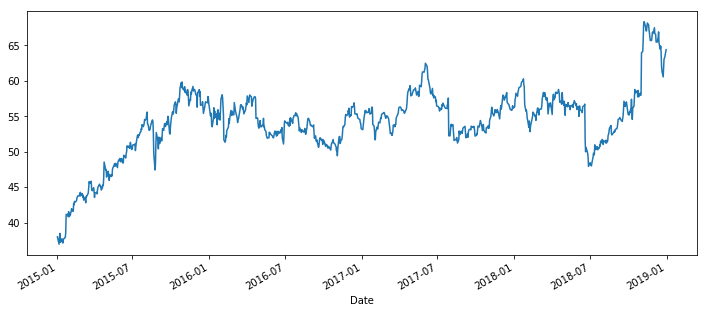

In [85]:
df['Close'].plot.line(figsize=(12,5))

In [86]:
#7 day rolling mean
df.rolling(window = 7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


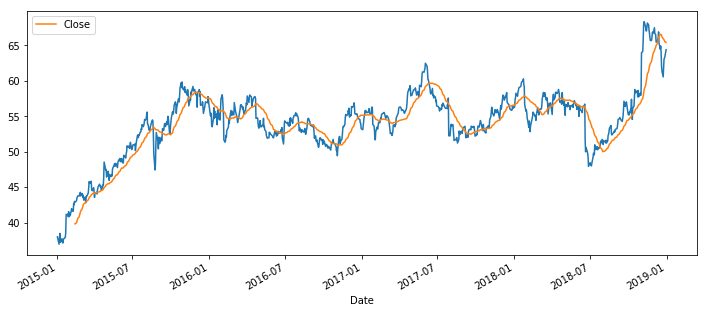

In [87]:
df['Close'].plot.line(figsize = (12,5))

df.rolling(window = 30).mean()['Close'].plot.line(legend = True) #30 day rolling average

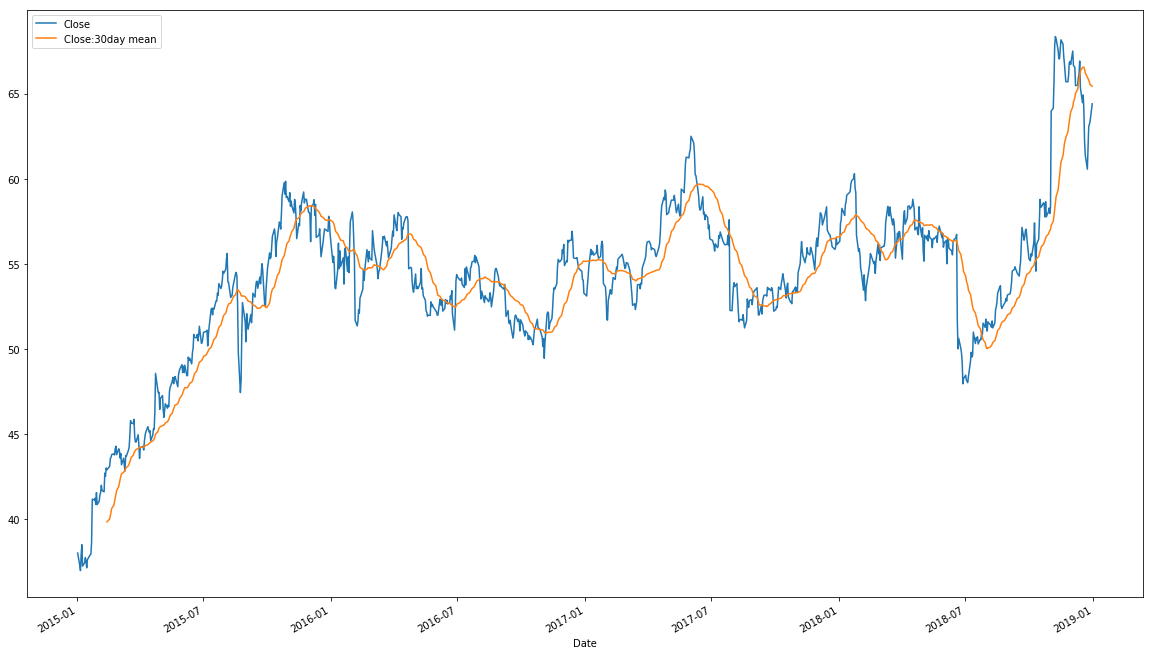

In [88]:
df['Close:30day mean'] = df['Close'].rolling(30).mean()
df[['Close','Close:30day mean']].plot.line(figsize = (20,12),legend = True)

In [89]:
df

,Close,Volume,Close:30day mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
2015-01-09,37.2361,27556706,NaN
2015-01-12,37.4415,10021486,NaN
2015-01-13,37.7401,11040702,NaN
2015-01-14,37.5301,9295084,NaN


### Expanding
Instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

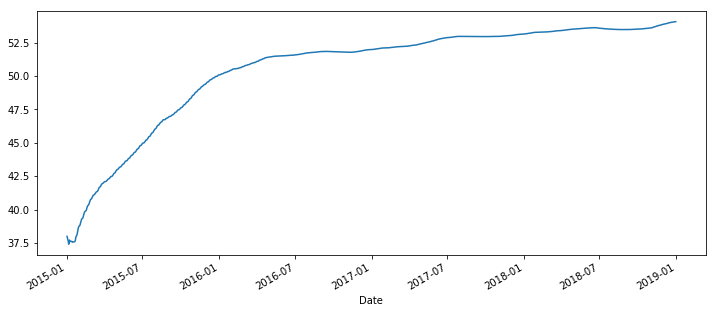

In [90]:
df['Close'].expanding().mean().plot(figsize=(12,5))

# Time series Viz

In [96]:
df=pd.read_csv('starbucks.csv',index_col = 'Date',parse_dates = True) #importing again due to changes made previously

In [98]:
df.index #ensuring that index is in datetime format

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [100]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


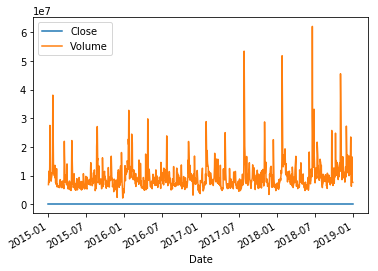

In [101]:
#let's access the basic viz for dataframe
df.plot() #plots 'close' and 'volume' columns

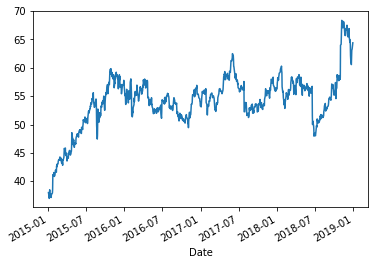

In [104]:
df['Close'].plot()

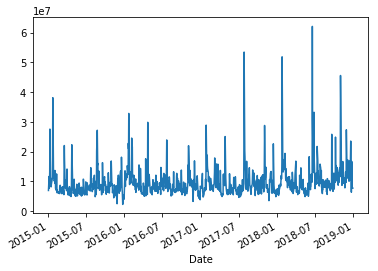

In [105]:
df['Volume'].plot()

## Plot formatting

[Text(0, 0.5, 'Stock price'), Text(0.5, 0, 'Date')]

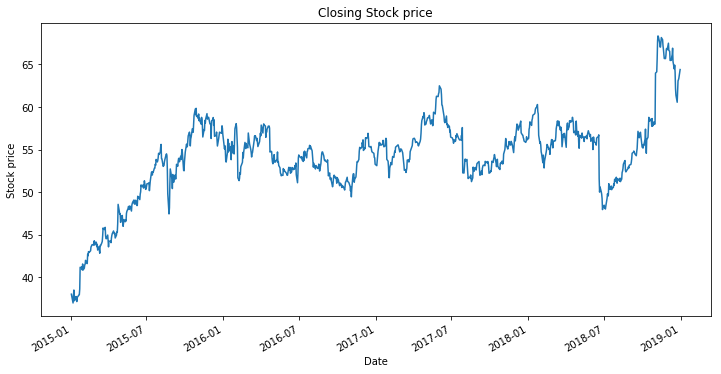

In [109]:
ax = df['Close'].plot(figsize = (12,6),title = 'Closing Stock price')
ax.set(xlabel = 'Date',ylabel = 'Stock price')


[Text(0, 0.5, 'Stock price'), Text(0.5, 0, 'Date')]

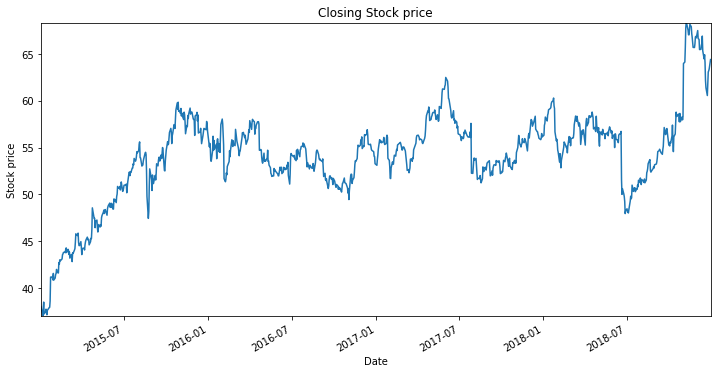

In [110]:
#scaling the graph to remove unwanted white space.  
#use axis ='both' to remove white spaces from both axis
#use axis = 'x' or axis = 'y' to scale either one of them
ax = df['Close'].plot(figsize = (12,6),title = 'Closing Stock price')
ax.autoscale(axis ='both',tight = True)
ax.set(xlabel = 'Date',ylabel = 'Stock price')

## Slicing and vizualizing time series

### Method 1: Series Indexing

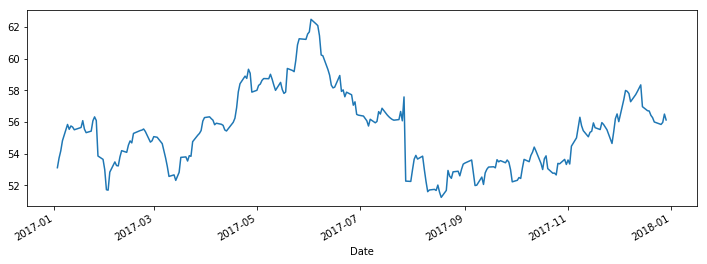

In [112]:
# plotting slice of the whole time series
# plotting for only 2017 year
df['Close']['2017-01-01':'2017-12-31'].plot(figsize = (12,4))

### Method 2 : Passing as an argument

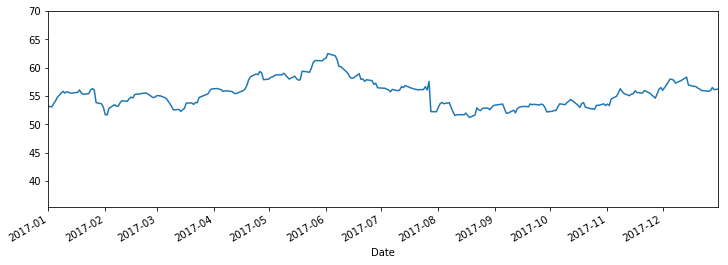

In [114]:
df['Close'].plot(figsize = (12,4),xlim = ['2017-01-01','2017-12-31']) #graphs different due to scaling

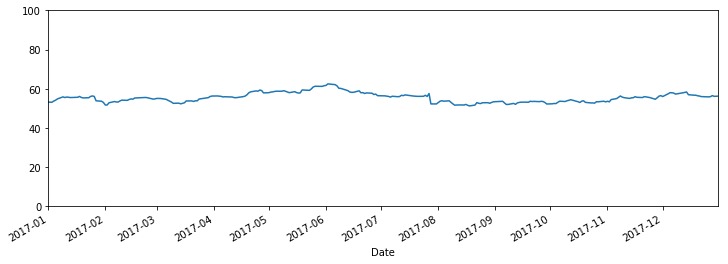

In [123]:
df['Close'].plot(figsize = (12,4),xlim = ['2017-01-01','2017-12-31'],ylim = [0,100])

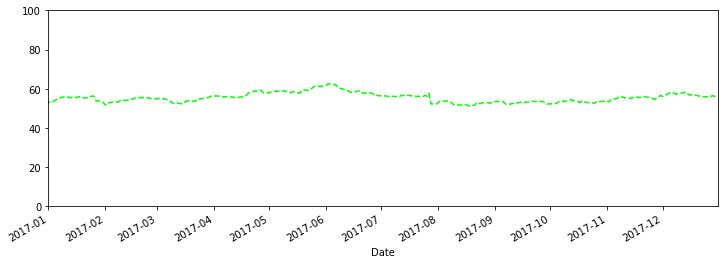

In [125]:
df['Close'].plot(figsize = (12,4),xlim = ['2017-01-01','2017-12-31'],ylim = [0,100],ls = '--',c = '#00FF00') 
#passing hexcode

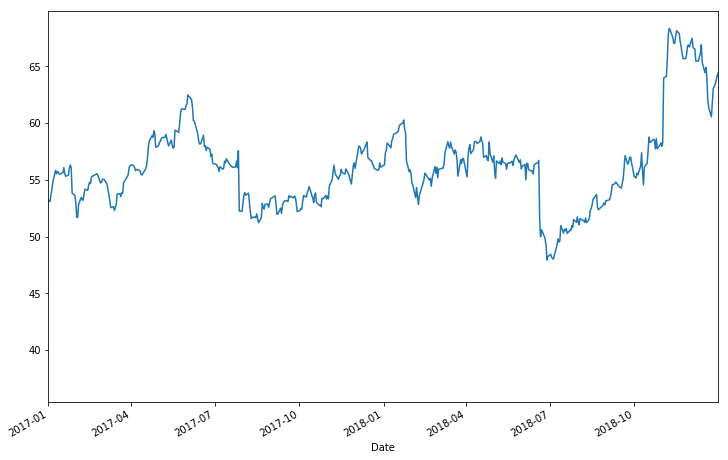

In [126]:
df['Close'].plot(figsize =(12,8),xlim =['2017-01-01',df.index.max()])

## X Ticks
How to customize date on x-axis

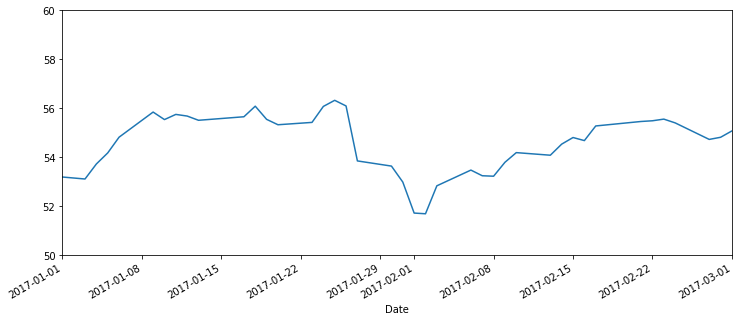

In [131]:
from matplotlib import dates
df['Close'].plot(figsize = (12,5),xlim = ['2017-01-01','2017-03-01'],ylim = [50,60])

The X axis ticks looks weird due to default python spacing. 

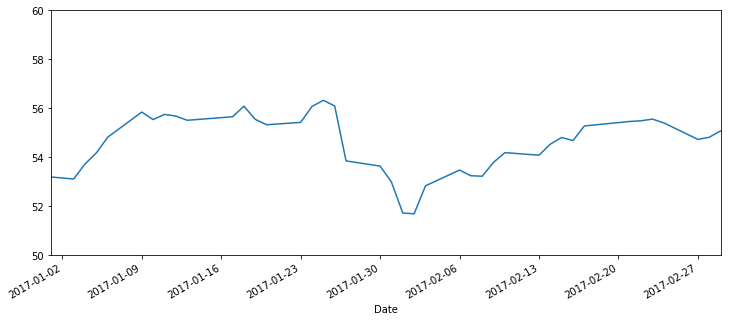

In [134]:
ax = df['Close'].plot(figsize = (12,5),xlim = ['2017-01-01','2017-03-01'],ylim = [50,60])
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0)) # 0 means monday, 1 is tuesday and so on

We have a wide way to customize the ticks. Checkout the [documentation](https://matplotlib.org/api/dates_api.html#matplotlib.dates.WeekdayLocator)

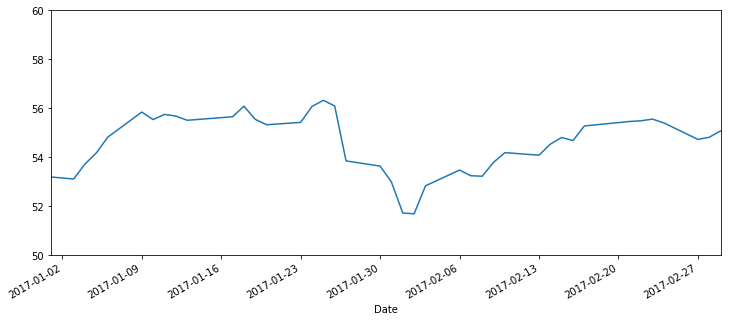

In [136]:
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
ax = df['Close'].plot(figsize = (12,5),xlim = ['2017-01-01','2017-03-01'],ylim = [50,60])
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = MO)) #by mondays

## Date formatting
We will use [strftime](https://docs.python.org/2/library/datetime.html#datetime.datetime.strftime),which is part of datetime module to format time. We need to understand the formatting of strftime. [reference](http://strftime.org/)

| Code | Meaning                                                                                                                                                                          | Example                  | 
|------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------| 
| %a   | Weekday as locale’s abbreviated name.                                                                                                                                            | Mon                      | 
| %A   | Weekday as locale’s full name.                                                                                                                                                   | Monday                   | 
| %w   | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.                                                                                                                | 1                        | 
| %d   | Day of the month as a zero-padded decimal number.                                                                                                                                | 30                       | 
| %-d  | Day of the month as a decimal number. (Platform specific)                                                                                                                        | 30                       | 
| %b   | Month as locale’s abbreviated name.                                                                                                                                              | Sep                      | 
| %B   | Month as locale’s full name.                                                                                                                                                     | September                | 
| %m   | Month as a zero-padded decimal number.                                                                                                                                           | 09                       | 
| %-m  | Month as a decimal number. (Platform specific)                                                                                                                                   | 9                        | 
| %y   | Year without century as a zero-padded decimal number.                                                                                                                            | 13                       | 
| %Y   | Year with century as a decimal number.                                                                                                                                           | 2013                     | 
| %H   | Hour (24-hour clock) as a zero-padded decimal number.                                                                                                                            | 07                       | 
| %-H  | Hour (24-hour clock) as a decimal number. (Platform specific)                                                                                                                    | 7                        | 
| %I   | Hour (12-hour clock) as a zero-padded decimal number.                                                                                                                            | 07                       | 
| %-I  | Hour (12-hour clock) as a decimal number. (Platform specific)                                                                                                                    | 7                        | 
| %p   | Locale’s equivalent of either AM or PM.                                                                                                                                          | AM                       | 
| %M   | Minute as a zero-padded decimal number.                                                                                                                                          | 06                       | 
| %-M  | Minute as a decimal number. (Platform specific)                                                                                                                                  | 6                        | 
| %S   | Second as a zero-padded decimal number.                                                                                                                                          | 05                       | 
| %-S  | Second as a decimal number. (Platform specific)                                                                                                                                  | 5                        | 
| %f   | Microsecond as a decimal number, zero-padded on the left.                                                                                                                        | 000000                   | 
| %z   | UTC offset in the form +HHMM or -HHMM (empty string if the the object is naive).                                                                                                 |                          | 
| %Z   | Time zone name (empty string if the object is naive).                                                                                                                            |                          | 
| %j   | Day of the year as a zero-padded decimal number.                                                                                                                                 | 273                      | 
| %-j  | Day of the year as a decimal number. (Platform specific)                                                                                                                         | 273                      | 
| %U   | Week number of the year (Sunday as the first day of the week) as a zero padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0. | 39                       | 
| %W   | Week number of the year (Monday as the first day of the week) as a decimal number. All days in a new year preceding the first Monday are considered to be in week 0.             | 39                       | 
| %c   | Locale’s appropriate date and time representation.                                                                                                                               | Mon Sep 30 07:06:05 2013 | 
| %x   | Locale’s appropriate date representation.                                                                                                                                        | 09/30/13                 | 
| %X   | Locale’s appropriate time representation.                                                                                                                                        | 07:06:05                 | 
| %%   | A literal '%' character.                                                                                                                                                         | %                        | 





In [139]:
#example of using strftime
import datetime as dt
now = dt.datetime.now()
now

datetime.datetime(2019, 7, 21, 19, 17, 19, 757242)

In [143]:
dt.datetime.strftime(now,'%m/%d/%Y')
#or
now.strftime('%m/%d/%Y')

'07/21/2019'

In [144]:
now.strftime("%m/%d/%Y, %H:%M:%S")

'07/21/2019, 19:17:19'

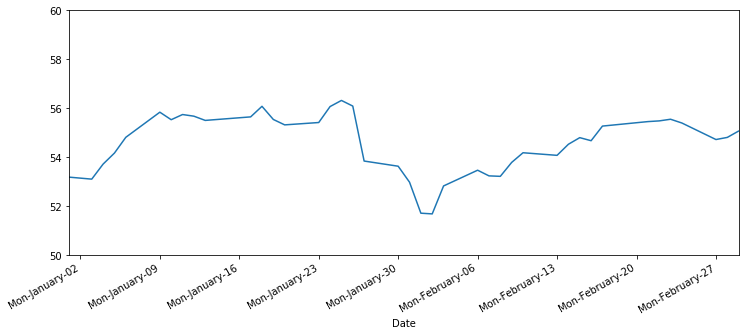

In [146]:
ax = df['Close'].plot(figsize = (12,5),xlim = ['2017-01-01','2017-03-01'],ylim = [50,60])
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0)) # 0 means monday, 1 is tuesday and so on
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

### adding major and minor axis



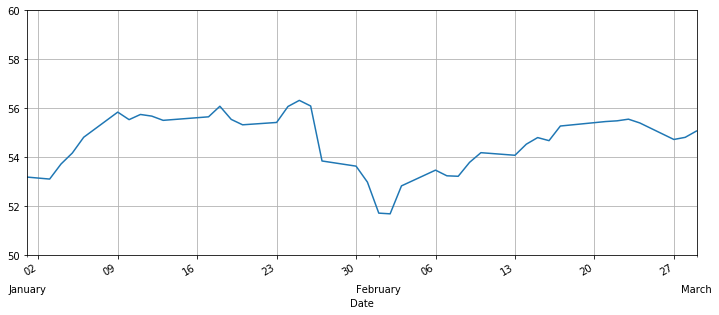

In [151]:
ax = df['Close'].plot(figsize = (12,5),xlim = ['2017-01-01','2017-03-01'],ylim = [50,60])
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0)) # 0 means monday, 1 is tuesday and so on
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%B')) #adding spaces between major and minor axis - '\n'

ax.xaxis.grid(True)
ax.yaxis.grid(True)


No one usually remebers these many formatting rules. You usually copy and paste from `stackoverflow` until the code runs